In [3]:
import numpy as np

class KnnClassifier:
    def __init__(self, labels, samples):
        self.labels = labels
        self.samples = samples

    def classify(self, point, k=3):
        dist = np.array([np.linalg.norm(point - s) for s in self.samples])

        ndx = dist.argsort()
        votes = {}
        for i in range(k):
            label = self.labels[ndx[i]]
            votes.setdefault(label, 0)
            votes[label] += 1
        return max(votes)

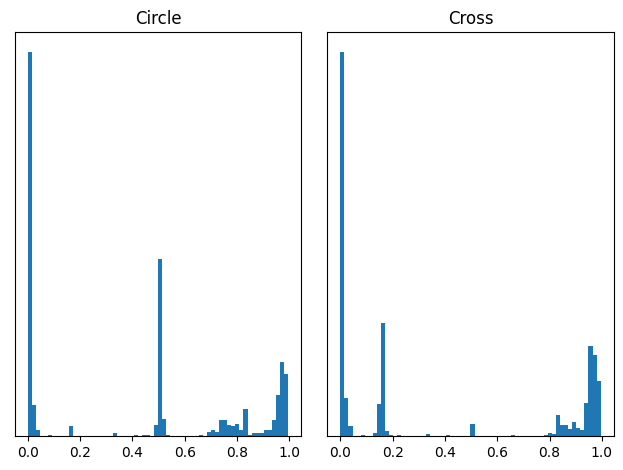

In [4]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2hsv


im_circle = imread("data/circle/train/circle_0.png")
hsv_circle = rgb2hsv(im_circle)
hue_circle = hsv_circle[:,:,0].ravel()

im_cross = imread("data/cross/train/cross_0.png")
hsv_cross = rgb2hsv(im_cross)
hue_cross = hsv_cross[:,:,0].ravel()

fig, axs = plt.subplots(1, 2)

axs[0].hist(hue_circle, 64)
axs[0].set_title("Circle")
axs[0].set_yticks([])

axs[1].hist(hue_cross, 64)
axs[1].set_title("Cross")
axs[1].set_yticks([])

plt.tight_layout()
plt.show()

In [5]:
import glob

def color_feature_extraction(im, dim=64):
    hsv = rgb2hsv(im)
    hue = hsv[:,:,0].ravel()
    hue_hist, _ = np.histogram(hue, dim)
    hue_hist = hue_hist / np.max(hue_hist)
    return hue_hist


filenames = glob.glob("./data/cross/train/*.png")
cross_features = []
for filename in filenames:
    im = imread(filename)
    f = color_feature_extraction(im)
    cross_features.append(f)

filenames = glob.glob("./data/circle/train/*.png")
circle_features = []
for filename in filenames:
    im = imread(filename)
    f = color_feature_extraction(im)
    circle_features.append(f)

labels = np.hstack([np.repeat("cross", 100), np.repeat("circle", 100)])
samples = np.vstack([np.array(cross_features), np.array(circle_features)])

In [6]:
knn = KnnClassifier(labels, samples)

In [7]:
filenames = glob.glob("./data/cross/validation/*.png")
cross_validation_features = []
for filename in filenames:
    im = imread(filename)
    f = color_feature_extraction(im)
    cross_validation_features.append(f)

filenames = glob.glob("./data/circle/validation/*.png")
circle_validation_features = []
for filename in filenames:
    im = imread(filename)
    f = color_feature_extraction(im)
    circle_validation_features.append(f)

In [10]:
pred = knn.classify(circle_validation_features[0])
print(f"Prediction: {pred} (Correct label: circle)")
# Prediction: circle

pred = knn.classify(cross_validation_features[0])
print(f"Prediction: {pred} (Correct label: cross)")
# Prediction: cross


Prediction: circle (Correct label: circle)
Prediction: cross (Correct label: cross)


In [9]:
circle_result = [1 if knn.classify(f) == "circle" else 0 for f in circle_validation_features]
cross_result = [1 if knn.classify(f) == "cross" else 0 for f in cross_validation_features]
